<a href="https://www.kaggle.com/code/yahyasoker/gold-price-prediction-using-randomforestregressor?scriptVersionId=127915667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### [1.Preparing Data](#1)
### [2.Correlation](#2)

    1-Positive Correlation
    2-Negative Correlation
### [3.Training Data](#3)
### [4.Predicting](#4)

<a id='1'></a>
### 1.Preparing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")

In [3]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [4]:
df.shape

(2290, 6)

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<a id='2'></a>
### 2.Correlation
    1-Positive Correlation
    2-Negative Correlation

In [7]:
correlation = df.corr()

<AxesSubplot:>

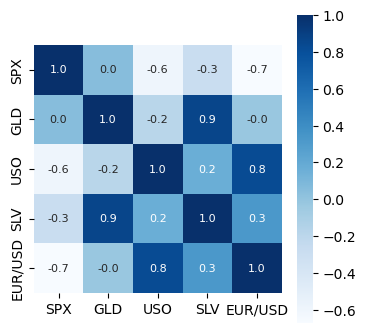

In [8]:
plt.figure(figsize = (4,4))
sns.heatmap(correlation, cbar=True, square=True, 
            fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='GLD', ylabel='Density'>

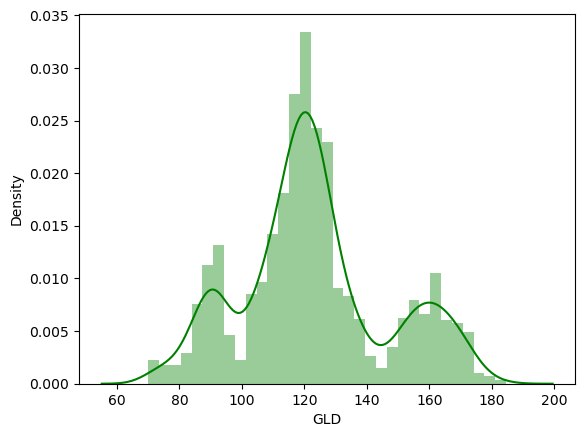

In [10]:
sns.distplot(df['GLD'],color='green')

<a id='3'></a>
### 3.Training Data

In [11]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [13]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

<a id='4'></a>
### 4.Predicting

In [14]:
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[122.6354993  129.9613009  127.79179984  96.80519846 119.07720061
 115.00310013 125.10700107 117.84739944 107.95220109  98.19409979
  95.57189867 168.17520023 147.79880148 116.47850047 170.87570142
  85.10390104 122.71589871 109.70359669 113.62270078 131.59690238
 124.37739903 114.15990089 116.42049986 109.14939905 108.64960162
 125.82469948 119.82579928 112.48579916 113.3141015  125.37089904
 146.62970298  89.53919993 167.53779899 113.93049937 108.27950121
 120.27910076 141.52499875 161.20880179 174.01809778 152.81770283
 119.38400112 113.81070039 121.37749946 113.70729952 121.89860009
 107.9079009   88.24079892 114.47009924 129.30419991 118.33539969
 103.45290047 129.15459997 107.56469836 160.43160077 131.41940058
 117.34660004 146.99129985 135.68610234  95.51770132 124.69010169
 114.84029861  86.06090084 104.39419889 113.96540041  84.22259983
 122.2455002  116.18789957 113.67910207 165.23840183  91.9010002
  80.16710077 160.96060132 158.27970168 106.72159988 150.1716016
 109.3583983

In [15]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R squared error: {error_score} ")

R squared error: 0.9909853209646942 


In [16]:
y_test = list(y_test)

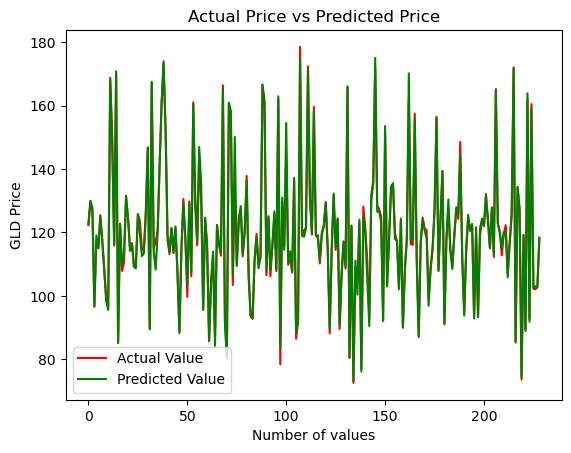

In [17]:
plt.plot(y_test, color='Red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()